## Pandas "Avanzado"

In [5]:
from pandasql import sqldf
import pandas as pd
pysqldf = lambda q: sqldf(q, globals())

In [8]:
data=pd.read_excel("C:/Users/Jorge/Documents/Clases tec/visual_inters/Clase 4/Heroes.xlsx", sheet_name='Purchases')

In [9]:
data.head(10)

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392
5,5,2,Yalae81,22,0,81,3.61,4,0.16,12.1296
6,6,3,Itheria73,36,0,169,2.18,3,0.13,5.6898
7,7,2,Iskjaskst81,20,0,162,2.67,5,0.19,10.8135
8,8,1,Undjask33,22,0,21,1.10,5,0.13,4.7850
9,9,1,Chanosian48,35,999,136,3.58,4,0.21,11.3128


In [12]:
data.columns

Index(['Purchase ID', 'Server ID', 'SN', 'Age', 'ID Gender', 'Item ID',
       'Price', 'Quantity', 'Discount', 'Total'],
      dtype='object')

### Group By
¿Qué Servidor es el que tiene más jugadores?

Usando SQL

In [15]:
pysqldf("""
SELECT [Server ID], COUNT(SN) as NumPlayers
FROM data
GROUP BY [Server ID]
""")

,Server ID,NumPlayers
0,1,166
1,2,152
2,3,145
3,4,165
4,5,152


Usando Pandas

In [16]:
data.groupby('Server ID')

In [17]:
data.groupby('Server ID').count()

,Purchase ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
Server ID,,,,,,,,,
1,166,166,166,166,166,166,166,166,166
2,152,152,152,152,152,152,152,152,152
3,145,145,145,145,145,145,145,145,145
4,165,165,165,165,165,165,165,165,165
5,152,152,152,152,152,152,152,152,152


In [18]:
data.groupby('Server ID').count()['SN']

Server ID
1    166
2    152
3    145
4    165
5    152
Name: SN, dtype: int64

In [20]:
data.groupby('Server ID').agg('count')['SN']

Server ID
1    166
2    152
3    145
4    165
5    152
Name: SN, dtype: int64

In [21]:
data.groupby('Server ID').agg(['min', 'max'])['Discount']

,min,max
Server ID,,
1,0.0,0.25
2,0.0,0.24
3,0.0,0.25
4,0.0,0.25
5,0.0,0.25


Usando Group By con una función propia

In [26]:
from functools import reduce
def total(series):
      return reduce(lambda x, y: x + y, series)
    
data.groupby('Server ID').agg(total)

,Purchase ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
Server ID,,,,,,,,,
1,64572,Lisim78Lisovynya38Ithergue48Undjask33Chanosian...,3744,3026,15853,494.92,590,20.34,1569.1896
2,65636,Chamassasya86Yalae81Iskjaskst81Inguron55Haisri...,3338,26,13702,437.21,498,20.29,1226.8519
3,52762,Itheria73Iathenudil29Farusrian86Haillyrgue51So...,3327,2018,13668,456.57,502,18.18,1389.4689
4,61330,Iskosia90Saesrideu94Lisassa64Chamalo71Eyrian71...,3849,7012,15004,514.21,558,20.71,1524.7604
5,59510,Lisirra25Phiarithdeu40Siarithria38Siala43Lirto...,3459,3016,13342,476.86,526,19.51,1409.1469


Usando Group By en varias columnas

In [28]:
data.groupby('Server ID').agg({'Age': ['min', 'max'], 'Total': 'sum'})

Age          Total
          min max        sum
Server ID                   
1           7  44  1569.1896
2           7  45  1226.8519
3           7  41  1389.4689
4           8  42  1524.7604
5           7  44  1409.1469

### Usando Joins

In [32]:
Server=pd.read_excel("C:/Users/Jorge/Documents/Clases tec/visual_inters/Clase 4/Heroes.xlsx", sheet_name='Server')
Server.head()

,Server ID,Server
0,1,America
1,2,Asia
2,3,Europe
3,4,LatinAmerica
4,5,China


In [35]:
pysqldf("""
SELECT *
FROM data as d 
INNER JOIN Server as S
ON S.[Server ID]=d.[Server ID]
LIMIT 5""")

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total,Server ID,Server
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369,1,America
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820,1,America
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584,1,America
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895,2,Asia
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392,4,LatinAmerica


In [46]:
data.join(Server, how='inner', on='Server ID', lsuffix='_left', rsuffix='_right').head(5)

,Server ID,Purchase ID,Server ID_left,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total,Server ID_right,Server
0,1,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369,2,Asia
1,1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820,2,Asia
2,1,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584,2,Asia
8,1,8,1,Undjask33,22,0,21,1.10,5,0.13,4.7850,2,Asia
9,1,9,1,Chanosian48,35,999,136,3.58,4,0.21,11.3128,2,Asia


In [47]:
data.join(Server, how='left', on='Server ID', lsuffix='_left', rsuffix='_right').head(5)

,Purchase ID,Server ID_left,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total,Server ID_right,Server
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369,2.0,Asia
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820,2.0,Asia
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584,2.0,Asia
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895,3.0,Europe
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392,5.0,China


### Otro Group BY
Pero mas potente, y funciona igual que las tablas dinámicas de Excel

In [52]:
import numpy as np
pd.pivot_table(data, values='Price', index=['SN'],
                    columns=['Server ID'], aggfunc=np.sum).head()

Server ID,1,2,3,4,5
SN,,,,,
Adairialis76,NaN,NaN,NaN,NaN,2.28
Adastirin33,4.48,NaN,NaN,NaN,NaN
Aeda94,NaN,NaN,NaN,4.91,NaN
Aela59,NaN,NaN,NaN,4.32,NaN
Aelaria33,1.79,NaN,NaN,NaN,NaN


In [53]:
temp=pd.pivot_table(data, values='Price', index=['SN'],
                    columns=['Server ID'], aggfunc=np.sum)

temp.fillna(0)

Server ID,1,2,3,4,5
SN,,,,,
Adairialis76,0.00,0.00,0.00,0.00,2.28
Adastirin33,4.48,0.00,0.00,0.00,0.00
Aeda94,0.00,0.00,0.00,4.91,0.00
Aela59,0.00,0.00,0.00,4.32,0.00
Aelaria33,1.79,0.00,0.00,0.00,0.00
...,...,...,...,...,...
Yathecal82,0.00,3.80,2.42,0.00,0.00
Yathedeu43,0.00,2.27,0.00,3.75,0.00
Yoishirrala98,0.00,0.00,4.58,0.00,0.00


### Tablas Cruzadas
Calcula una tabla cruzada, si lo que entra son series categoricas el resultado es una tabla de frecuencias

In [65]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)

In [66]:
print(a)
print(b)

['foo' 'foo' 'foo' 'foo' 'bar' 'bar' 'bar' 'bar' 'foo' 'foo' 'foo']
['one' 'one' 'one' 'two' 'one' 'one' 'one' 'two' 'two' 'two' 'one']


In [67]:
pd.crosstab(a, b, rownames=['a'], colnames='b')

b,one,two
a,,
bar,3,1
foo,4,3


### Concatenar tablas
En SQL existe UNION o UNION ALL para hacer esto mismo

In [69]:
data.head(2)

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820


In [70]:
data.tail(2)

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
778,778,5,Sisur91,7,0,92,4.19,2,0.08,7.7096
779,779,1,Ennrian78,24,0,50,4.60,1,0.17,3.8180


In [72]:
pd.concat([data.head(2), data.tail(2)])

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
778,778,5,Sisur91,7,0,92,4.19,2,0.08,7.7096
779,779,1,Ennrian78,24,0,50,4.60,1,0.17,3.8180


### Creando una variable condicional
Hay varias formas de hacerlo, una es usando una función, otra en caso de ser un caso binario con np.where, otra es "abusando" del hecho de que las columnas son series y generando una lista con los valores que necesitamos y permitir la conversión interna de Pandas

In [73]:
data.head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


Vamos a crear una variable que indique con un 1 si el descuento es mayor a 10% y 0 en caso contrario

In [75]:
data["Nueva variable"]=np.where(data["Discount"]>0.1,1, 0)
data.head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total,Nueva variable
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369,0
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820,0
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584,0
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895,1
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392,0


In [76]:
data['Nueva variable2'] = [1 if x >0.1  else 0 for x in data['Discount']]
data.head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total,Nueva variable,Nueva variable2
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369,0,0
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820,0,0
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584,0,0
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895,1,1
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392,0,0


In [79]:
def set_value(row):
    if row["Discount"] > 0.1:
        return 1
    else:
        return 0

data = data.assign(Nueva_variable3=data.apply(set_value, axis=1))
data.head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total,Nueva variable,Nueva variable2,Nueva_variable3
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369,0,0,0
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820,0,0,0
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584,0,0,0
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895,1,1,1
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392,0,0,0


# Introducción a Numpy
https://numpy.org/doc/stable/

What is NumPy?

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays

In [80]:
print(type(data.Quantity))

<class 'pandas.core.series.Series'>


In [84]:
print(type(data.Quantity.to_numpy()))

<class 'numpy.ndarray'>


Hay algunos escenarios en que es mejor usar numpy que Pandas y hay que tenerlos en consideración para poder usar la mejor opción

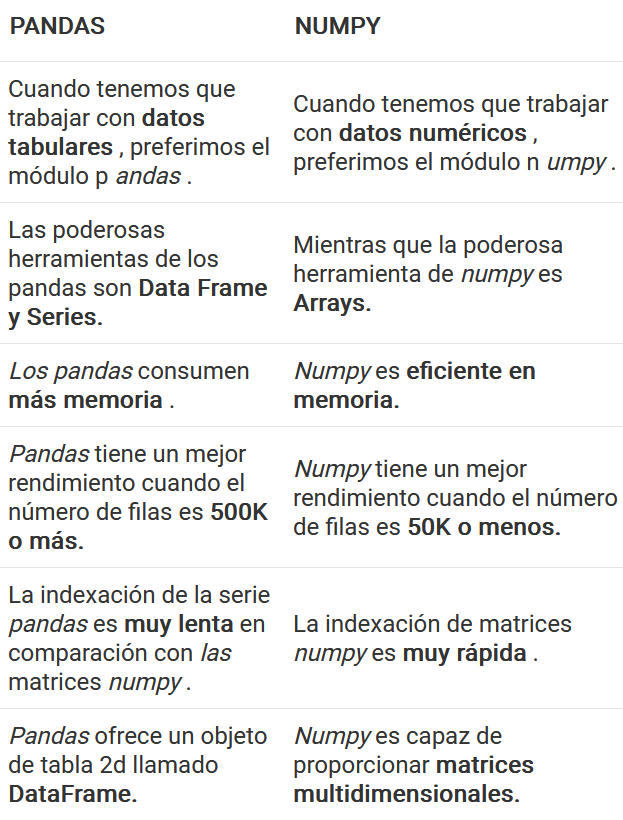

In [88]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # arreglo uno-dimensional
x2 = np.random.randint(10, size=(3, 4))  # arreglo dos-dimensional
x3 = np.random.randint(10, size=(3, 4, 5))  # arreglo tres-dimensional

In [90]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [91]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Accesando a los valores del arreglo

In [93]:
x3[0][0]

array([8, 1, 5, 9, 8])

In [97]:
x3[0:2,0:1]

array([[[8, 1, 5, 9, 8]],

       [[0, 1, 9, 9, 0]]])

In [98]:
x3[0:2,0:1] + x3[2:3,1:2] 

array([[[15, 10, 14, 12, 14]],

       [[ 7, 10, 18, 12,  6]]])

In [99]:
x3.__array_interface__['data'][0]

2713121921264

In [100]:
np.sum(x3)

263

In [106]:
print(x3[0:2,0,0])
print(x3[1:3,0,0])
np.dot(x3[0:2,0,0],x3[1:3,0,0] )

[8 0]
[0 4]


0

In [108]:
np.multiply(x3[0:2,0,0],x3[1:3,0,0])

array([0, 0])

In [110]:
print(x3[0:2,0:1])
np.cumsum(x3[0:2,0:1])

[[[8 1 5 9 8]]

 [[0 1 9 9 0]]]


array([ 8,  9, 14, 23, 31, 31, 32, 41, 50, 50], dtype=int32)

In [114]:
df = pd.DataFrame(x2, columns = ['Column_A','Column_B','Column_C', 'Column_D'])

print(df)

   Column_A  Column_B  Column_C  Column_D
0         3         5         2         4
1         7         6         8         8
2         1         6         7         7
